In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
K=8
death_ratio = np.array([0.00000000e+00, 3.36964689e-06, 2.19595034e-05, 4.49107573e-05,
               1.88422215e-04, 4.99762978e-04, 1.89895681e-03, 7.40632275e-03])

In [3]:
all_death = pd.read_csv("../data/orszagos_halott.csv", sep=',')[:755]
death_orig = np.array(all_death[181:181+180]["Hétnapos mozgóátlag"])

In [4]:
def get_inf_curve(filename, death = None, K= 8):
    df = pd.read_csv(filename, sep=',')
    inf_cols = [c for c in df.columns if c[0:2]=='I_']
    inf_cols2 = [c for c in df.columns if c[0:2]=='I2']
    Is = df.filter(inf_cols, axis=1)
    Is2 = df.filter(inf_cols2, axis=1)
    
    I = np.zeros((len(Is), K, len(Is.columns)//K))
    for c in Is.columns:
        _,city,age = c.split("_")
        I[:,int(age), int(city)] = Is.loc[:, c]
    I2 = np.zeros((len(Is2), K, len(Is2.columns)//K))
    for c in Is2.columns:
        _,city,age = c.split("_")
        I2[:,int(age), int(city)] = Is2.loc[:, c]
    
    I = np.sum(I, axis=2)
    I2 = np.sum(I2, axis=2)
    if type(death) != None:
        return np.sum(I*death, axis=1), Is.sum(axis=1), Is2.sum(axis=1)
    else:
        return Is.sum(axis=1), Is2.sum(axis=1)

def get_inf_curve2(filename, death_ratio, all_death, K= 8):
    df = pd.read_csv(filename, sep=',')
    inf_cols = [c for c in df.columns if c[0:2]=='I_']
    inf_cols2 = [c for c in df.columns if c[0:2]=='I2']
    Is = df.filter(inf_cols, axis=1)
    Is2 = df.filter(inf_cols2, axis=1)
    
    I = np.zeros((len(Is), K, len(Is.columns)//K))
    for c in Is.columns:
        _,city,age = c.split("_")
        I[:,int(age), int(city)] = Is.loc[:, c]
    I2 = np.zeros((len(Is2), K, len(Is2.columns)//K))
    for c in Is2.columns:
        _,city,age = c.split("_")
        I2[:,int(age), int(city)] = Is2.loc[:, c]
    
    I = np.sum(I, axis=2)
    I2 = np.sum(I2, axis=2)
    if type(death) != None:
        return np.sum(I*death_ratio*(all_death/np.sum(I)), axis=1), Is.sum(axis=1), Is2.sum(axis=1)
    else:
        return Is.sum(axis=1), Is2.sum(axis=1)

def fit(x,y):
    min_ind = 0
    MIN = 1e12
    for shift in range(25):
        orig_shifted = x[shift:len(y)+25-(25-shift)]
        l2 = np.sqrt(np.sum((orig_shifted-y)**2))
        if l2 < MIN:
            MIN = l2
            min_ind = shift
    return min_ind, MIN



R0=1.84 ==> Optimal shift: 22 (l2 = 370.1737642149865)
R0=1.89 ==> Optimal shift: 24 (l2 = 401.6959461616061)
R0=1.95 ==> Optimal shift: 24 (l2 = 445.7281255186971)
R0=2.00 ==> Optimal shift: 24 (l2 = 501.77630040062024)


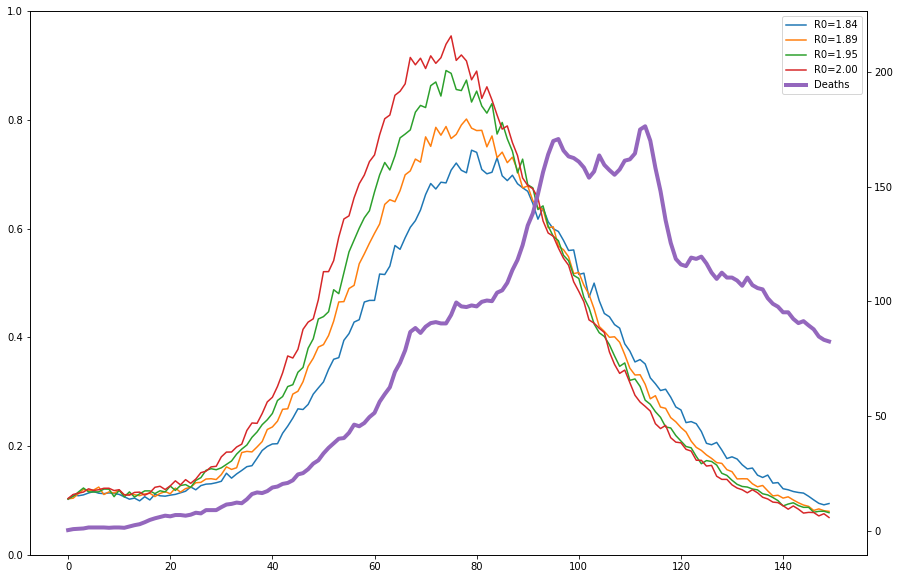

In [11]:
fig, axs = plt.subplots(1,1,figsize=(15,10))
ax = axs
ax2 = ax.twinx()
x = np.array(list(range(150)))

for i,R0 in zip(range(20)[16:], np.linspace(1.0, 2.0, 20)[16:]):
    death, Is,_ = get_inf_curve(f"../../output/R0_K2/{i}.txt", death = death_ratio*10)
    ax2.plot(x, death, label=f"R0={R0:.2f}")
    
    shift, l2 = fit(death_orig, death)
    print(f"R0={R0:.2f} ==> Optimal shift: {shift} (l2 = {l2})")

lns1 = ax2.plot(x, death_orig[:len(x)], label="Deaths", linewidth=4)
plt.legend()

R0=1.84 ==> Optimal shift: 22 (l2 = 370.1737642149865)


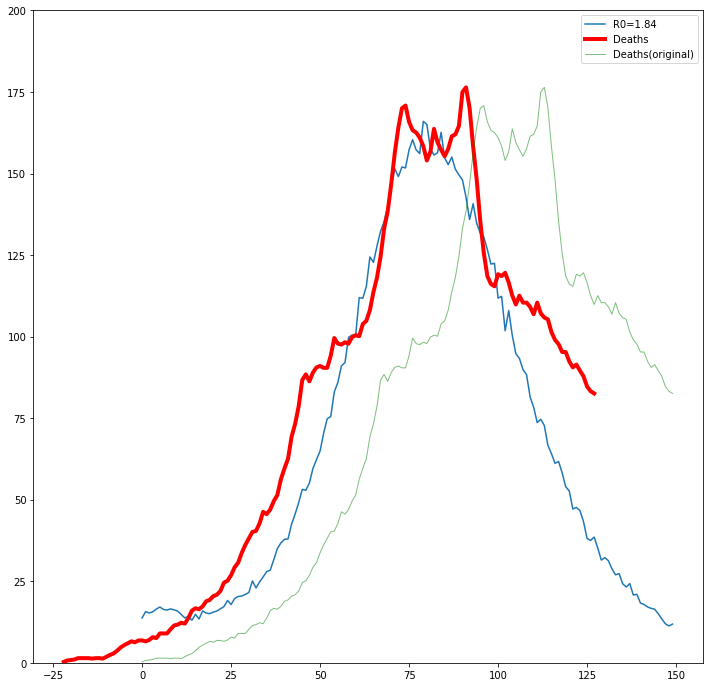

In [14]:
plt.figure(figsize=(12,12))
i,R0 = 16,1.84
death, Is, _ = get_inf_curve(f"../../output/R0_K2/{i}.txt", death = (death_ratio**1)*10)
shift, l2 = fit(death_orig, death)
plt.plot(x[:len(death)], death, label=f"R0={R0:.2f}")
plt.plot(x-shift, death_orig[:len(x)], c = 'r', label="Deaths", linewidth=4)
plt.plot(x, death_orig[:len(x)], c = 'g', label="Deaths(original)", linewidth=1, alpha=0.5)
plt.ylim(0,200)
plt.legend()

print(f"R0={R0:.2f} ==> Optimal shift: {shift} (l2 = {l2})")

R0=1.74 ==> Optimal shift: 15 (l2 = 385.7316748960649)
R0=1.79 ==> Optimal shift: 19 (l2 = 373.62207711679235)
R0=1.84 ==> Optimal shift: 22 (l2 = 370.1737642149865)
R0=1.89 ==> Optimal shift: 24 (l2 = 401.6959461616061)
R0=1.95 ==> Optimal shift: 24 (l2 = 445.7281255186971)
R0=2.00 ==> Optimal shift: 24 (l2 = 501.77630040062024)


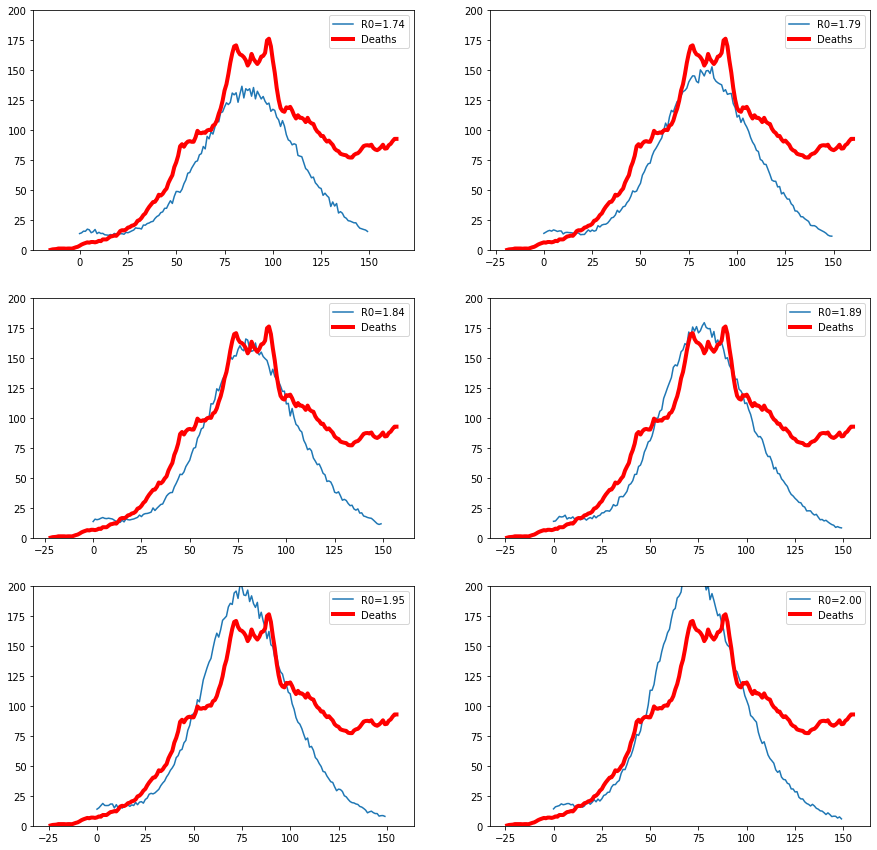

In [58]:
N,M = 3,2
fig, axs = plt.subplots(N,M,figsize=(15,15))
axs = [axs[i,j] for i in range(N) for j in range(M)]
lns = []
x = np.array(list(range(180)))
for i,R0,ax in zip(range(20)[20-N*M:], np.linspace(1.0, 2.0, 20)[20-N*M:], axs):
    death, Is, _ = get_inf_curve(f"../../output/R0_K2/{i}.txt", death = (death_ratio**1)*10)
    #death, Is, _ = get_inf_curve2(f"../../output/R0_K2/{i}.txt", death_ratio = (death_ratio**1), all_death = np.sum(death_orig))
    ax.plot(x[:len(death)], death, label=f"R0={R0:.2f}")
    
    shift, l2 = fit(death_orig, death)
    print(f"R0={R0:.2f} ==> Optimal shift: {shift} (l2 = {l2})")

    ln = ax.plot(x-shift, death_orig, c = 'r', label="Deaths", linewidth=4)
    ax.set_ylim(0,200)
    ax.legend()

R0=1.53 ==> Optimal shift: 0 (l2 = 563.07172794448)
R0=1.58 ==> Optimal shift: 4 (l2 = 511.01147307465715)
R0=1.63 ==> Optimal shift: 10 (l2 = 459.7882617109829)
R0=1.68 ==> Optimal shift: 11 (l2 = 407.714569061679)
R0=1.74 ==> Optimal shift: 15 (l2 = 385.7316748960649)
R0=1.79 ==> Optimal shift: 19 (l2 = 373.62207711679235)
R0=1.84 ==> Optimal shift: 22 (l2 = 370.1737642149865)
R0=1.89 ==> Optimal shift: 24 (l2 = 401.6959461616061)
R0=1.95 ==> Optimal shift: 24 (l2 = 445.7281255186971)
R0=2.00 ==> Optimal shift: 24 (l2 = 501.77630040062024)


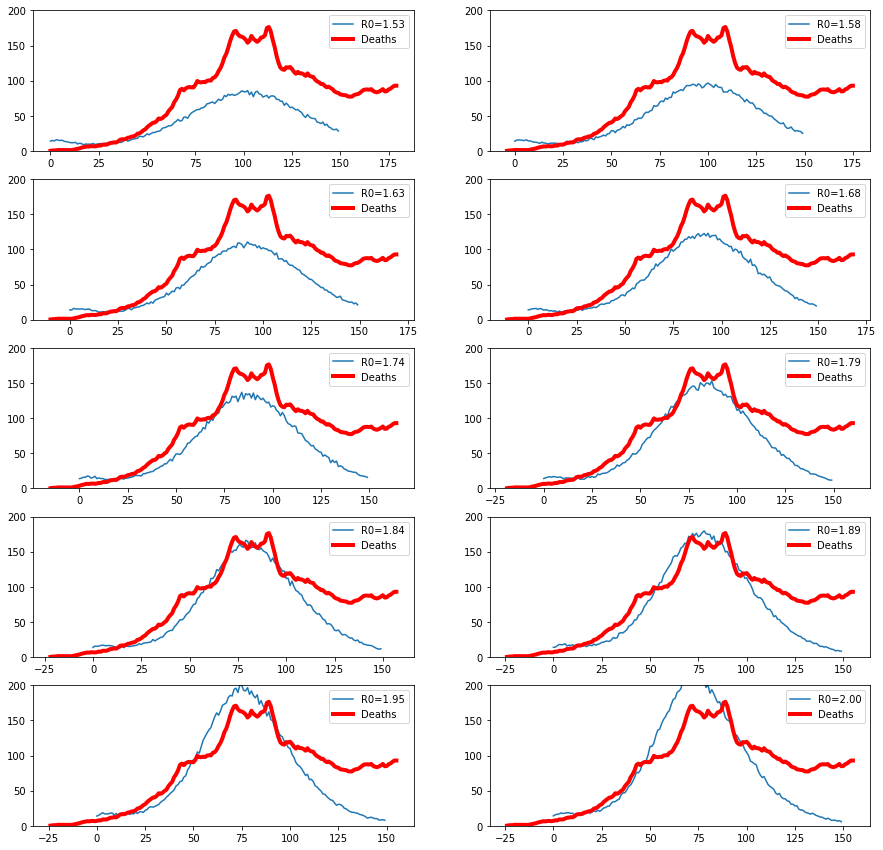

In [10]:
N,M = 5,2
fig, axs = plt.subplots(N,M,figsize=(15,15))
axs = [axs[i,j] for i in range(N) for j in range(M)]
lns = []
x = np.array(list(range(180)))
for i,R0,ax in zip(range(20)[20-N*M:], np.linspace(1.0, 2.0, 20)[20-N*M:], axs):
    death, Is = get_inf_curve(f"../../output/R0_K2/{i}.txt", death = (death_ratio**1)*10)
    ax.plot(x[:len(death)], death, label=f"R0={R0:.2f}")
    
    shift, l2 = fit(death_orig, death)
    print(f"R0={R0:.2f} ==> Optimal shift: {shift} (l2 = {l2})")

    ln = ax.plot(x-shift, death_orig, c = 'r', label="Deaths", linewidth=4)
    ax.set_ylim(0,200)
    ax.legend()

base ==> Optimal shift: 24 (l2 = 1262.9641221587547)


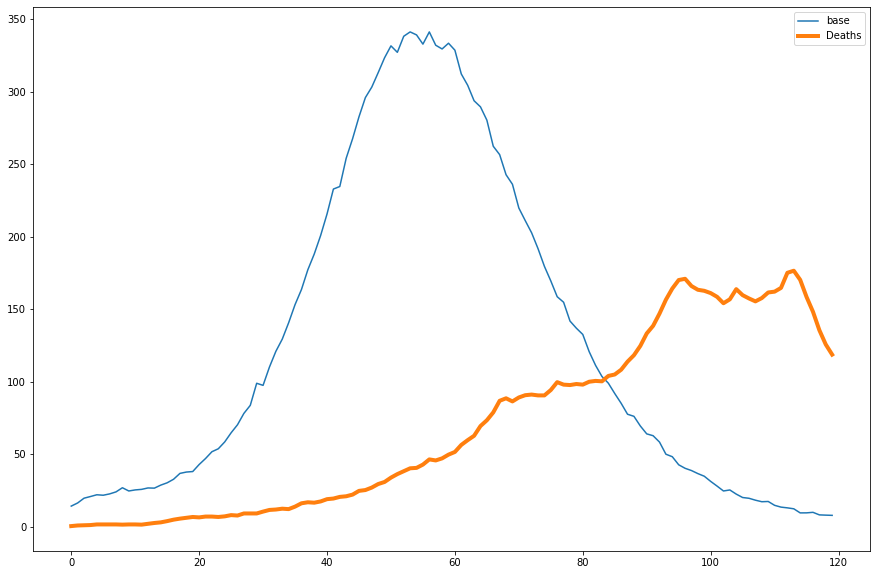

In [5]:
fig, axs = plt.subplots(1,1,figsize=(15,10))
ax = axs

death, Is, Is2 = get_inf_curve(f"../../output/second_wave/base", death = death_ratio*10)
x = np.array(list(range(len(death))))
ax.plot(x, death, label=f"base")

shift, l2 = fit(death_orig, death)
print(f"base ==> Optimal shift: {shift} (l2 = {l2})")

lns1 = ax.plot(x, death_orig[:len(x)], label="Deaths", linewidth=4)
plt.legend()
plt.show()

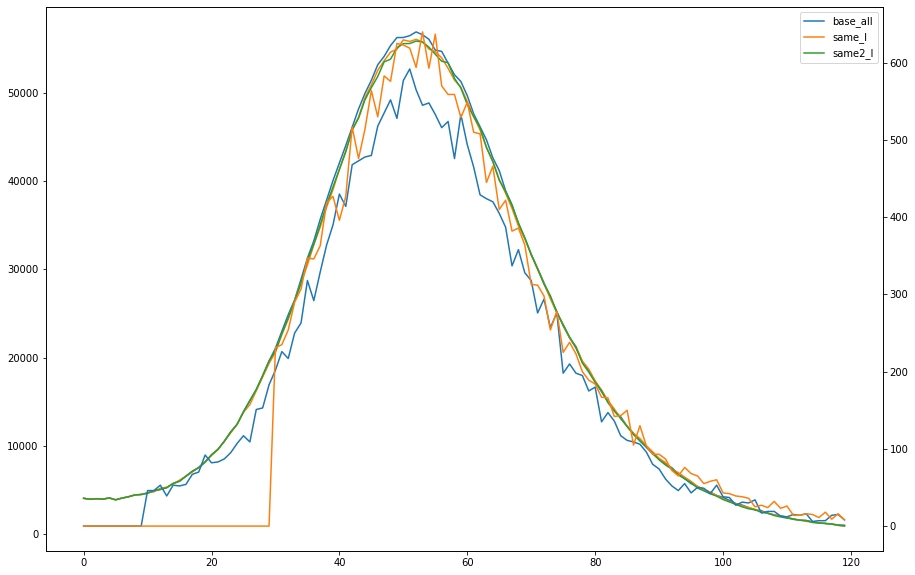

In [6]:
fig, axs = plt.subplots(1,1,figsize=(15,10))
ax = axs
ax2 = ax.twinx()
death, Is, Is2 = get_inf_curve(f"../../output/second_wave/base", death = death_ratio*10)
x = np.array(list(range(len(death))))
#ax.plot(x, Is, label=f"base_I")
#ax.plot(x, Is2, label=f"base_I2")
ax.plot(x, Is+Is2, label=f"base_all")

death, Is, Is2 = get_inf_curve(f"../../output/second_wave/same", death = death_ratio*10)
x = np.array(list(range(len(death))))
ax.plot(x, Is, label=f"same_I")
ax2.plot(x, Is2, label=f"same_I2")

death, Is, Is2 = get_inf_curve(f"../../output/second_wave/same2", death = death_ratio*10)
x = np.array(list(range(len(death))))
ax.plot(x, Is, label=f"same2_I")
ax2.plot(x, Is2, label=f"same2_I2")

ax.legend()

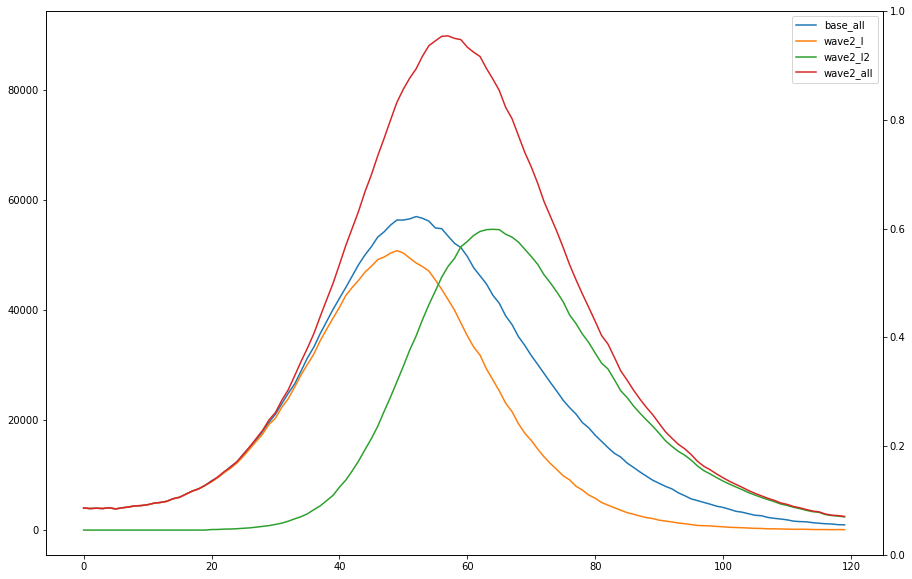

In [9]:
fig, axs = plt.subplots(1,1,figsize=(15,10))
ax = axs
ax2 = ax.twinx()
death, Is, Is2 = get_inf_curve(f"../../output/second_wave/base", death = death_ratio*10)
x = np.array(list(range(len(death))))
ax.plot(x, Is+Is2, label=f"base_all")

death, Is, Is2 = get_inf_curve(f"../../output/second_wave/second_20_2.0", death = death_ratio*10)
x = np.array(list(range(len(death))))
ax.plot(x, Is, label=f"wave2_I")
ax.plot(x, Is2, label=f"wave2_I2")
ax.plot(x, Is+Is2, label=f"wave2_all")

ax.legend()

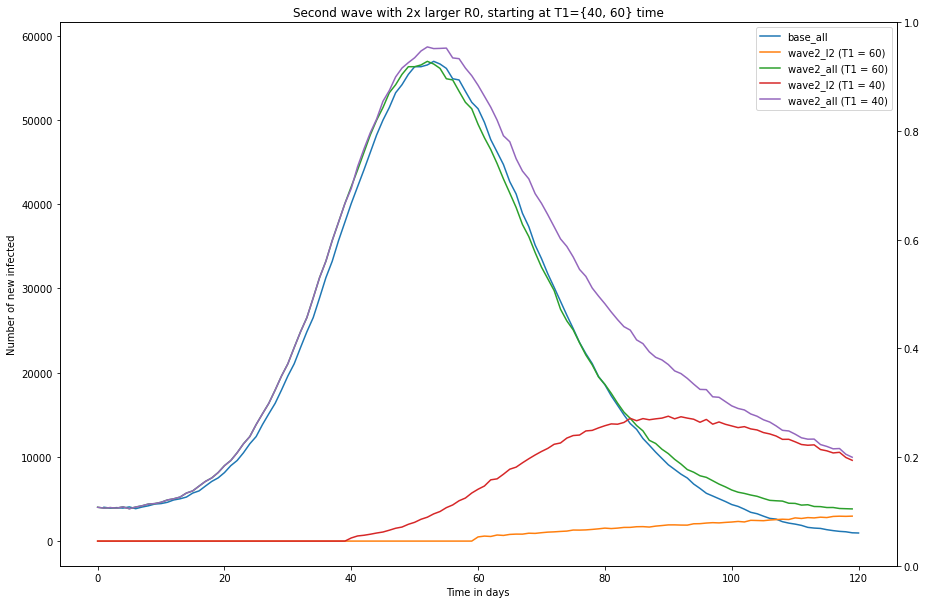

In [29]:
fig, axs = plt.subplots(1,1,figsize=(15,10))
ax = axs
ax2 = ax.twinx()
death, Is, Is2 = get_inf_curve(f"../../output/second_wave/base", death = death_ratio*10)
x = np.array(list(range(1, len(death)+1)))
ax.plot(x, Is+Is2, label=f"base_all")

death, Is, Is2 = get_inf_curve(f"../../output/second_wave/second_60_2.0", death = death_ratio*10)
ax.plot(x, Is2, label=f"wave2_I2 (T1 = 60)")
ax.plot(x, Is+Is2, label=f"wave2_all (T1 = 60)")

death, Is, Is2 = get_inf_curve(f"../../output/second_wave/second_40_2.0", death = death_ratio*10)
ax.plot(x, Is2, label=f"wave2_I2 (T1 = 40)")
ax.plot(x, Is+Is2, label=f"wave2_all (T1 = 40)")

ax.legend()
ax.set_xlabel("Time in days")
ax.set_ylabel("Number of new infected")
ax.set_title("Second wave with 2x larger R0, starting at T1={40, 60} time")
plt.show()

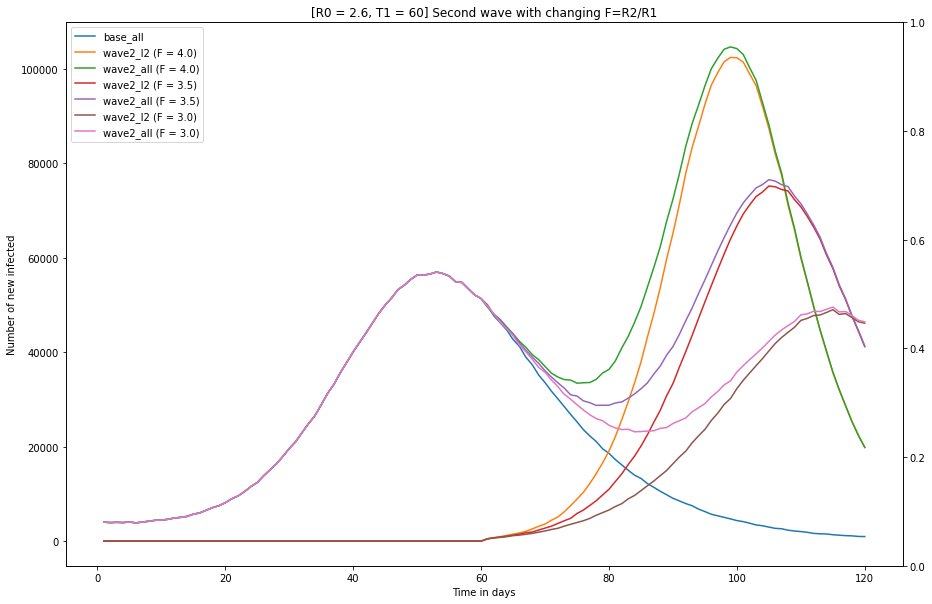

In [7]:
fig, axs = plt.subplots(1,1,figsize=(15,10))
ax = axs
ax2 = ax.twinx()
death, Is, Is2 = get_inf_curve(f"../../output/second_wave/base", death = death_ratio*10)
x = np.array(list(range(1, len(death)+1)))
ax.plot(x, Is+Is2, label=f"base_all")

death, Is, Is2 = get_inf_curve(f"../../output/second_wave/second_60_4.0", death = death_ratio*10)
ax.plot(x, Is2, label=f"wave2_I2 (F = 4.0)")
ax.plot(x, Is+Is2, label=f"wave2_all (F = 4.0)")

death, Is, Is2 = get_inf_curve(f"../../output/second_wave/second_60_3.5", death = death_ratio*10)
ax.plot(x, Is2, label=f"wave2_I2 (F = 3.5)")
ax.plot(x, Is+Is2, label=f"wave2_all (F = 3.5)")

death, Is, Is2 = get_inf_curve(f"../../output/second_wave/second_60_3.0", death = death_ratio*10)
ax.plot(x, Is2, label=f"wave2_I2 (F = 3.0)")
ax.plot(x, Is+Is2, label=f"wave2_all (F = 3.0)")



ax.legend()
ax.set_xlabel("Time in days")
ax.set_ylabel("Number of new infected")
ax.set_title("[R0 = 2.6, T1 = 60] Second wave with changing F=R2/R1")
plt.show()

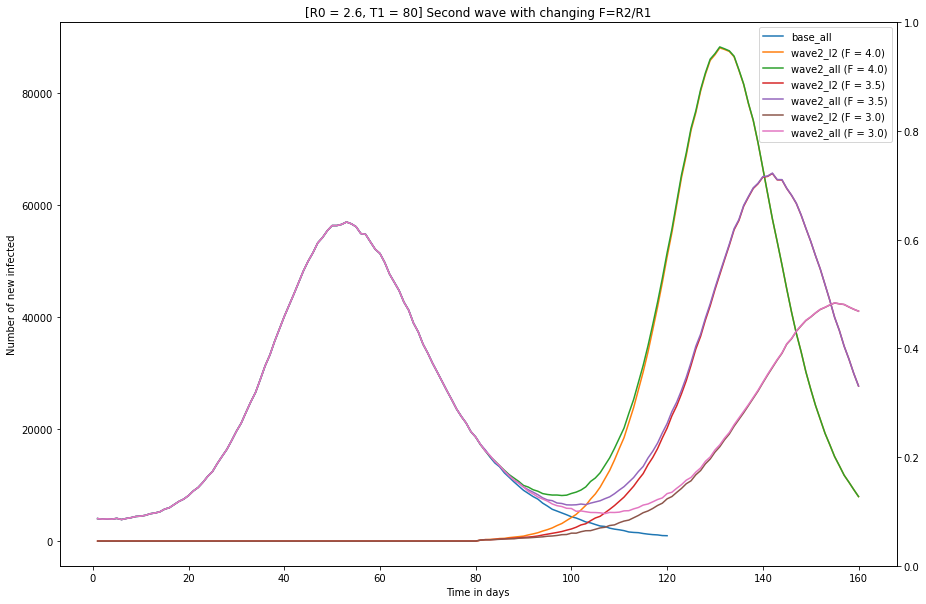

In [6]:
fig, axs = plt.subplots(1,1,figsize=(15,10))
ax = axs
ax2 = ax.twinx()
death, Is, Is2 = get_inf_curve(f"../../output/second_wave/base", death = death_ratio*10)
x = np.array(list(range(1, len(death)+1)))
ax.plot(x, Is+Is2, label=f"base_all")

death, Is, Is2 = get_inf_curve(f"../../output/second_wave/second_80_4.0", death = death_ratio*10)
x = np.array(list(range(1, len(death)+1)))
ax.plot(x, Is2, label=f"wave2_I2 (F = 4.0)")
ax.plot(x, Is+Is2, label=f"wave2_all (F = 4.0)")

death, Is, Is2 = get_inf_curve(f"../../output/second_wave/second_80_3.5", death = death_ratio*10)
ax.plot(x, Is2, label=f"wave2_I2 (F = 3.5)")
ax.plot(x, Is+Is2, label=f"wave2_all (F = 3.5)")

death, Is, Is2 = get_inf_curve(f"../../output/second_wave/second_80_3.0", death = death_ratio*10)
ax.plot(x, Is2, label=f"wave2_I2 (F = 3.0)")
ax.plot(x, Is+Is2, label=f"wave2_all (F = 3.0)")



ax.legend()
ax.set_xlabel("Time in days")
ax.set_ylabel("Number of new infected")
ax.set_title("[R0 = 2.6, T1 = 80] Second wave with changing F=R2/R1")
plt.show()

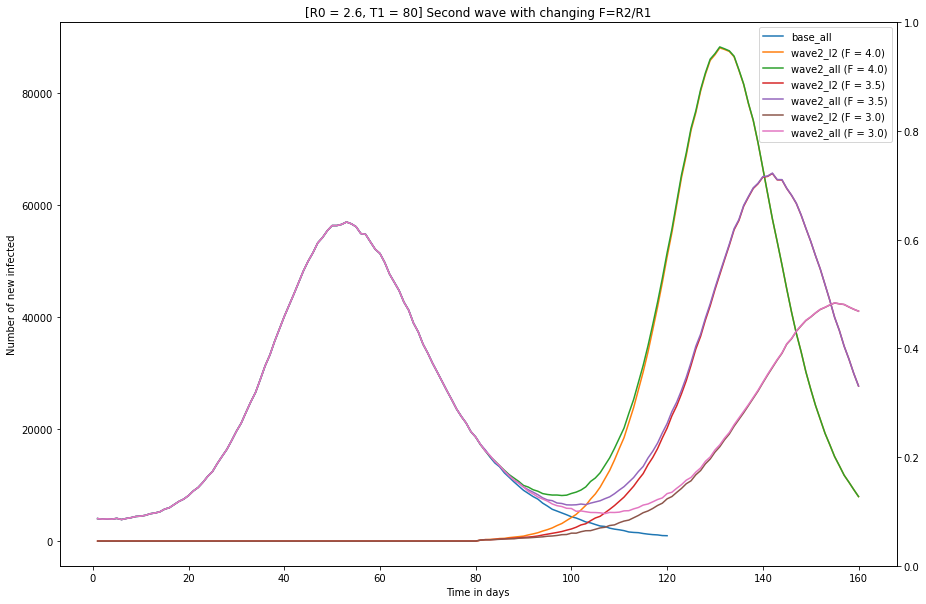

In [8]:
fig, axs = plt.subplots(1,1,figsize=(15,10))
ax = axs
ax2 = ax.twinx()
death, Is, Is2 = get_inf_curve(f"../../output/second_wave/base", death = death_ratio*10)
x = np.array(list(range(1, len(death)+1)))
ax.plot(x, Is+Is2, label=f"base_all")

death, Is, Is2 = get_inf_curve(f"../../output/second_wave/second_80_4.0", death = death_ratio*10)
x = np.array(list(range(1, len(death)+1)))
ax.plot(x, Is2, label=f"wave2_I2 (F = 4.0)")
ax.plot(x, Is+Is2, label=f"wave2_all (F = 4.0)")

death, Is, Is2 = get_inf_curve(f"../../output/second_wave/second_80_3.5", death = death_ratio*10)
ax.plot(x, Is2, label=f"wave2_I2 (F = 3.5)")
ax.plot(x, Is+Is2, label=f"wave2_all (F = 3.5)")

death, Is, Is2 = get_inf_curve(f"../../output/second_wave/second_80_3.0", death = death_ratio*10)
ax.plot(x, Is2, label=f"wave2_I2 (F = 3.0)")
ax.plot(x, Is+Is2, label=f"wave2_all (F = 3.0)")



ax.legend()
ax.set_xlabel("Time in days")
ax.set_ylabel("Number of new infected")
ax.set_title("[R0 = 2.6, T1 = 80] Second wave with changing F=R2/R1")
plt.show()

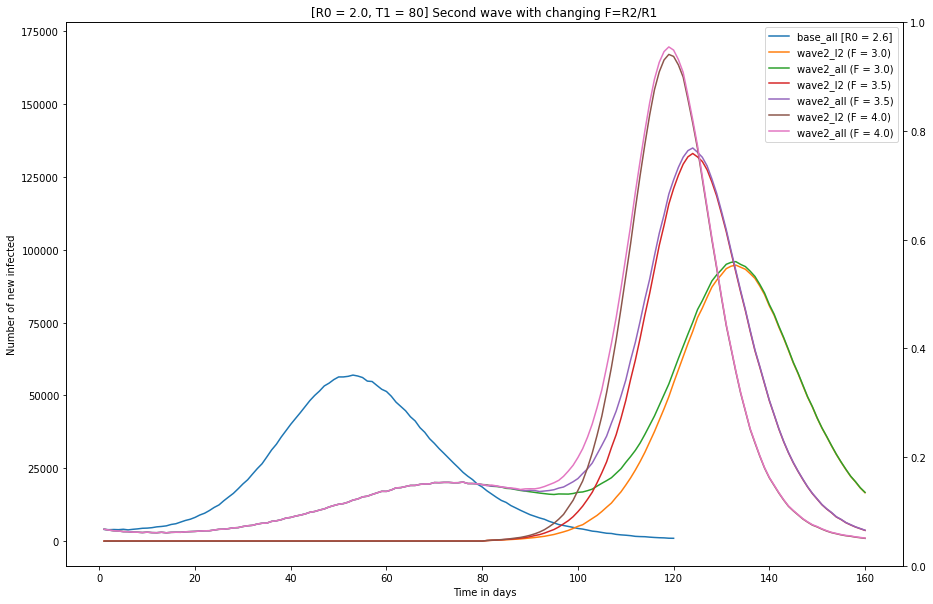

In [9]:
fig, axs = plt.subplots(1,1,figsize=(15,10))
ax = axs
ax2 = ax.twinx()
death, Is, Is2 = get_inf_curve(f"../../output/second_wave/base", death = death_ratio*10)
x = np.array(list(range(1, len(death)+1)))
ax.plot(x, Is+Is2, label=f"base_all [R0 = 2.6]")

measure = "second_wave/second_T1:80_R0:2.0"
for i,F in enumerate([3.0, 3.5, 4.0]):

    death, Is, Is2 = get_inf_curve(f"../../output/{measure}/{i}.txt", death = death_ratio*10)
    x = np.array(list(range(1, len(death)+1)))
    ax.plot(x, Is2, label=f"wave2_I2 (F = {F})")
    ax.plot(x, Is+Is2, label=f"wave2_all (F = {F})")


ax.legend()
ax.set_xlabel("Time in days")
ax.set_ylabel("Number of new infected")
ax.set_title("[R0 = 2.0, T1 = 80] Second wave with changing F=R2/R1")
plt.show()

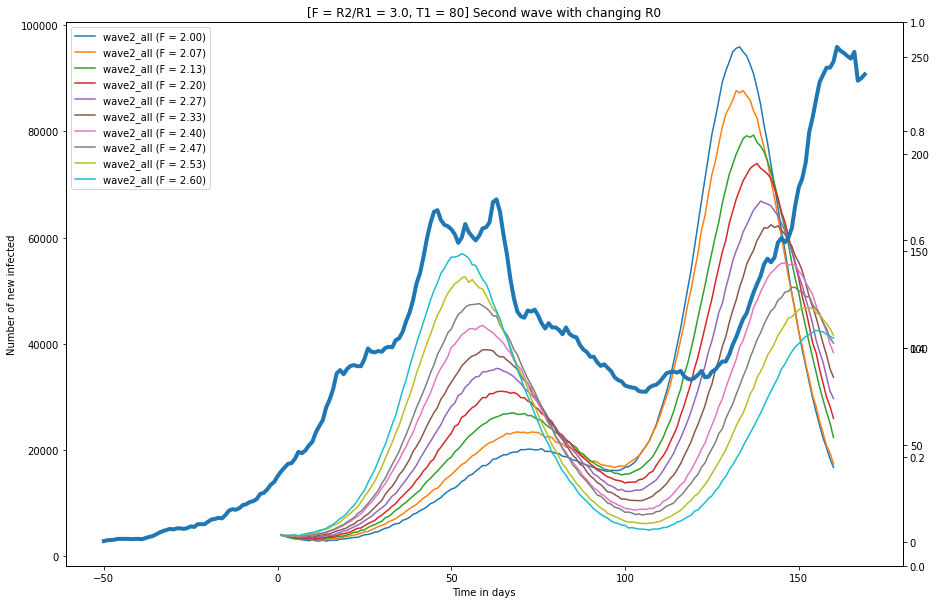

In [17]:
fig, axs = plt.subplots(1,1,figsize=(15,10))
ax = axs
ax2 = ax.twinx()
death, Is, Is2 = get_inf_curve(f"../../output/second_wave/base", death = death_ratio*10)
x = np.array(list(range(1, len(death)+1)))
#ax.plot(x, Is+Is2, label=f"base_all")

measure = "second_wave/second_T1:80_F:3.0"
for i,F in enumerate(np.linspace(2.0, 2.6, 10)):

    death, Is, Is2 = get_inf_curve(f"../../output/{measure}/{i}.txt", death = death_ratio*10)
    x = np.array(list(range(1, len(death)+1)))
    #ax.plot(x, Is2, label=f"wave2_I2 (F = {F:.2f})")
    ax.plot(x, Is+Is2, label=f"wave2_all (F = {F:.2f})")

x = np.array(range(-50, 220-50))
ax2 = ax.twinx()
death_orig = np.array(all_death[181:181+220]["Hétnapos mozgóátlag"])
lns1 = ax2.plot(x, death_orig[:len(x)], label="Deaths", linewidth=4)

ax.legend()
ax.set_xlabel("Time in days")
ax.set_ylabel("Number of new infected")
ax.set_title("[F = R2/R1 = 3.0, T1 = 80] Second wave with changing R0")
plt.show()

In [18]:
len(all_death[181:])

574

TypeError: unhashable type: 'numpy.ndarray'

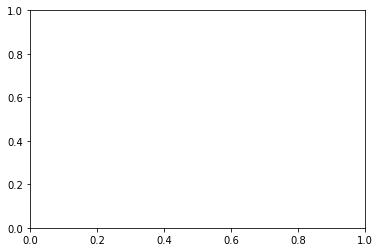

In [20]:
plt.plot(range(len(all_death[181:])), all_death[181:])